In [ ]:
from zipfile import ZipFile
import os

zip_path = "/content/PlantVillage.zip"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/PlantVillage")

base_dir = "/content/PlantVillage/PlantVillage"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT, IMG_WIDTH = 256, 256
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Train generator
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)
import os

folder_path = '/content/PlantVillage/PlantVillage'
items = os.listdir(folder_path)
print("Number of items:", len(items))

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Number of items: 3


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3,3), activation='relu',
           input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=3)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 701ms/step - accuracy: 0.5342 - loss: 1.3669 - val_accuracy: 0.8349 - val_loss: 0.4919
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 597ms/step - accuracy: 0.8204 - loss: 0.4791 - val_accuracy: 0.8256 - val_loss: 0.3875
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 580ms/step - accuracy: 0.8559 - loss: 0.3374 - val_accuracy: 0.9233 - val_loss: 0.2598
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 611ms/step - accuracy: 0.8893 - loss: 0.2863 - val_accuracy: 0.8930 - val_loss: 0.2683
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 594ms/step - accuracy: 0.8972 - loss: 0.2486 - val_accuracy: 0.9535 - val_loss: 0.1290
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 576ms/step - accuracy: 0.9319 - loss: 0.1664 - val_accuracy: 0.9581 - val_loss: 0.1481
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 597ms/step - accuracy: 0.9371 - loss: 0.1657 - val_accuracy: 0.9465 - val_loss: 0.1355
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 579ms/step - accuracy: 0.9483 - loss: 0.1634 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


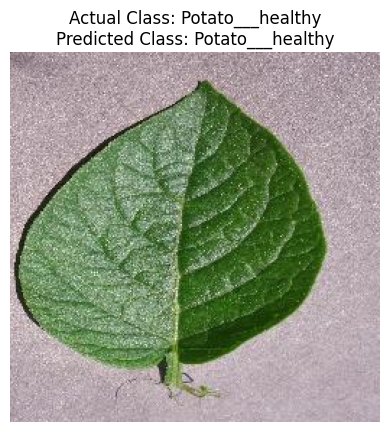

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import random
import matplotlib.pyplot as plt
import os

selected_class = random.choice(os.listdir(base_dir))
validation_folder = os.path.join(base_dir, selected_class)
random_img_path = os.path.join(validation_folder, random.choice(os.listdir(validation_folder)))

img = image.load_img(random_img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())

plt.imshow(img)
plt.axis('off')

plt.title(f"Actual Class: {selected_class}\nPredicted Class: {labels[predicted_class[0]]}")
plt.show()

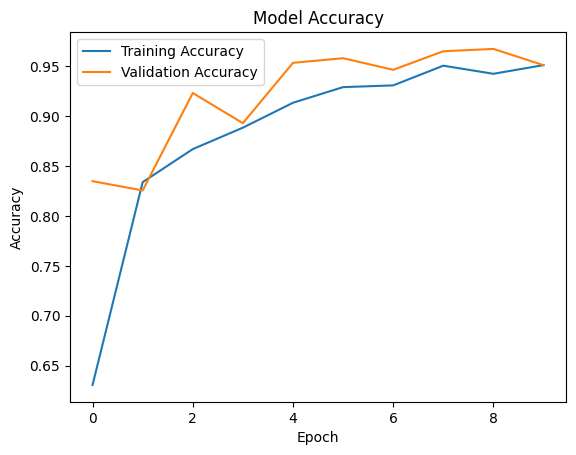

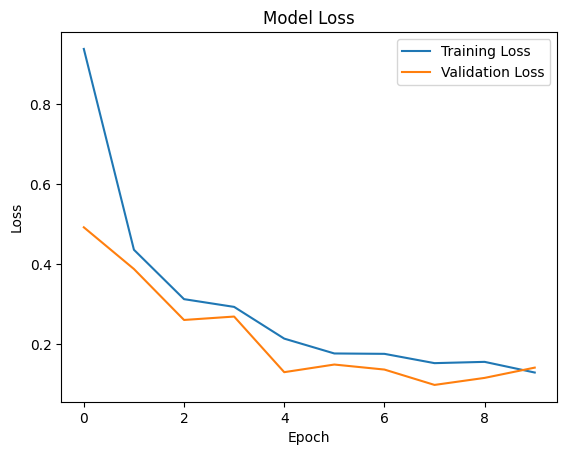

In [ ]:
# Plot Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('crop_disease_detection_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Confusion Matrix:
 [[193   7   0]
 [  5 195   0]
 [  1   7  22]]

Classification Report:
                        precision    recall  f1-score   support

Potato___Early_blight       0.97      0.96      0.97       200
 Potato___Late_blight       0.93      0.97      0.95       200
     Potato___healthy       1.00      0.73      0.85        30

             accuracy                           0.95       430
            macro avg       0.97      0.89      0.92       

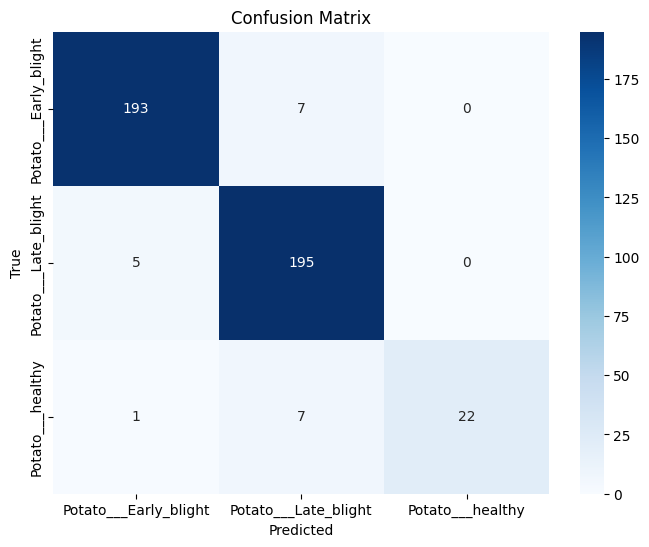

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_true = []
y_pred = []

val_generator.reset()

for i in range(len(val_generator)):

    x_batch, y_batch = val_generator.__next__()

    y_true_batch = np.argmax(y_batch, axis=1)
    y_pred_batch = np.argmax(model.predict(x_batch), axis=1)

    y_true.extend(y_true_batch)
    y_pred.extend(y_pred_batch)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

                       precision    recall  f1-score   support

Potato___Early_blight       0.99      0.98      0.99       200
 Potato___Late_blight       0.95      0.99      0.97       200
     Potato___healthy       1.00      0.80      0.89        30

             accuracy                           0.97       430
            macro avg       0.98      0.93      0.95       430
         weighted avg       0.98      0.97      0.97       430



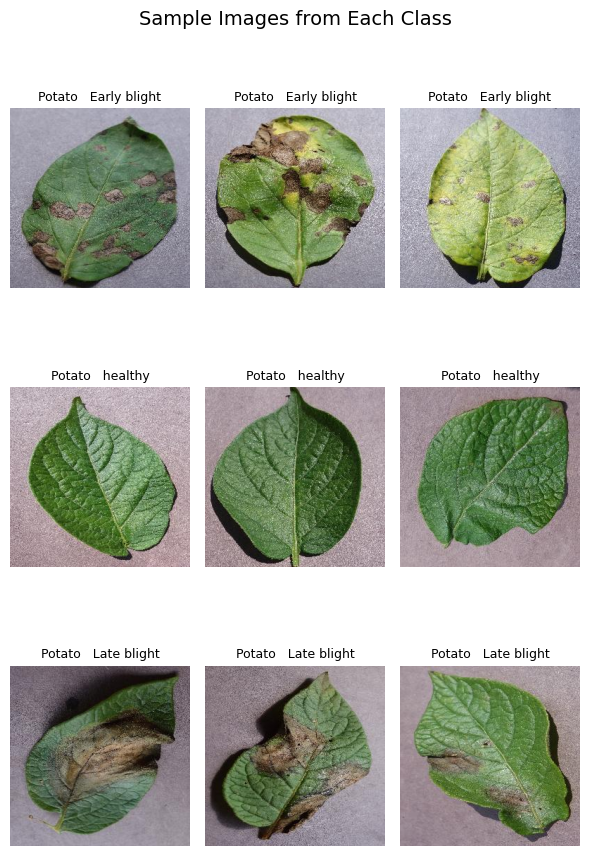

In [ ]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing import image

# Set image folder path
class_names = os.listdir(base_dir)

plt.figure(figsize=(6, 9))

img_per_class = 3
i = 1

for class_name in class_names:
    class_path = os.path.join(base_dir, class_name)
    img_files = random.sample(os.listdir(class_path), img_per_class)

    for img_file in img_files:
        img_path = os.path.join(class_path, img_file)
        img = image.load_img(img_path, target_size=(256, 256))
        plt.subplot(len(class_names), img_per_class, i)
        plt.imshow(img)
        plt.title(class_name.replace('_', ' '), fontsize=9)
        plt.axis('off')
        i += 1

plt.tight_layout()
plt.suptitle("Sample Images from Each Class", fontsize=14, y=1.02)
plt.show()
